## Identitas
# NIM       :     A11.2022.14400
# Nama      :     Azmi Jalaluddin Amron
# Kelompok  :     DS05

## Connect google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder

## Exploratory Data Analysis (EDA)

Shape (baris, kolom): (2111, 17)

Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2097 non-null   object
 1   Gender                          2102 non-null   object
 2   Height                          2099 non-null   object
 3   Weight                          2100 non-null   object
 4   CALC                            2106 non-null   object
 5   FAVC                            2100 non-null   object
 6   FCVC                            2103 non-null   object
 7   NCP                             2099 non-null   object
 8   SCC                             2101 non-null   object
 9   SMOKE                           2106 non-null   object
 10  CH2O                            2105 non-null   object
 11  family_history_with_overweight  2098 non-null   object
 12  

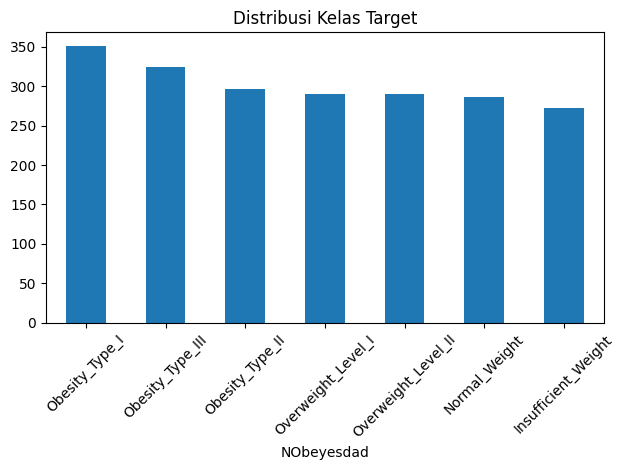

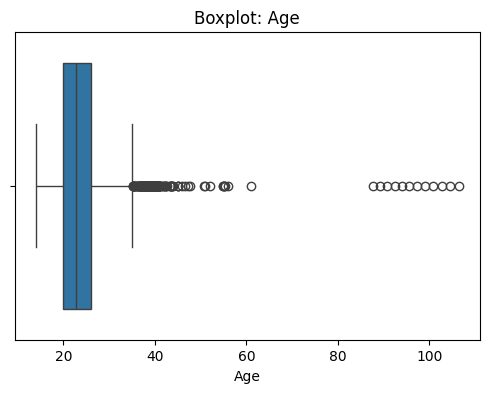

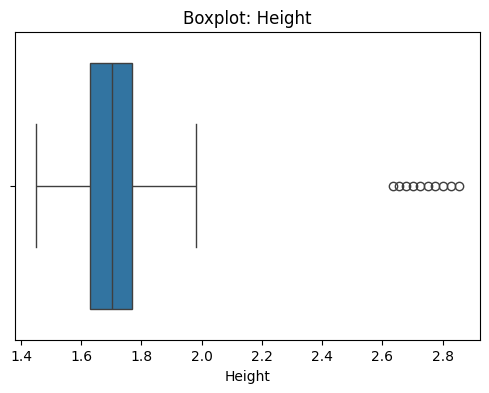

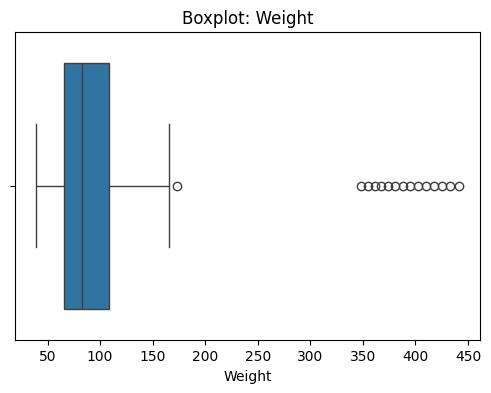

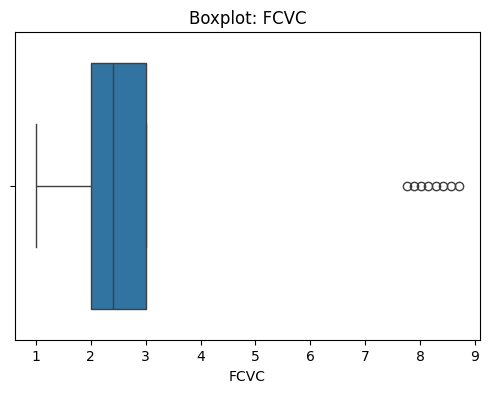

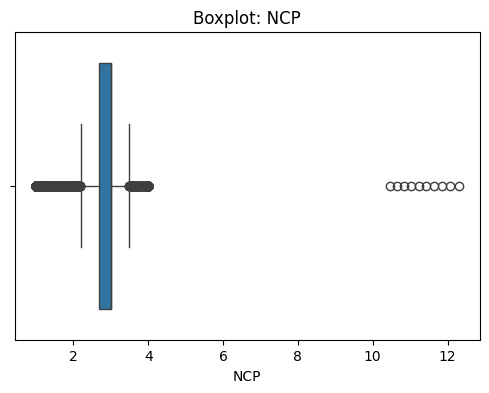

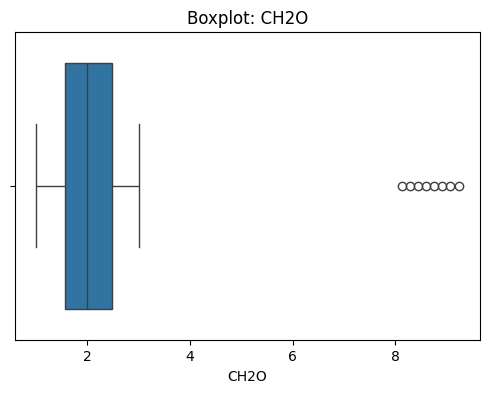

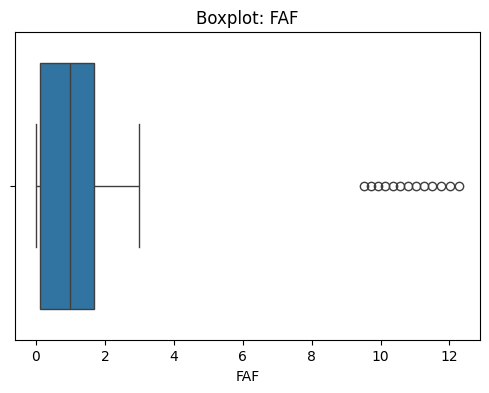

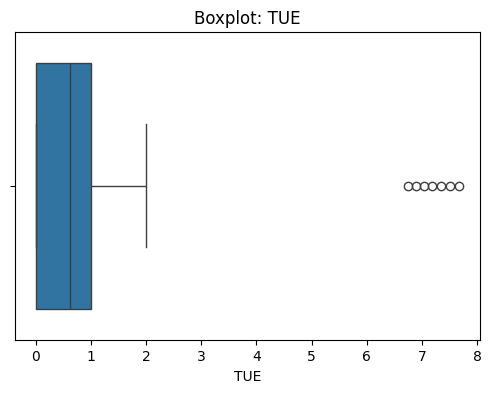

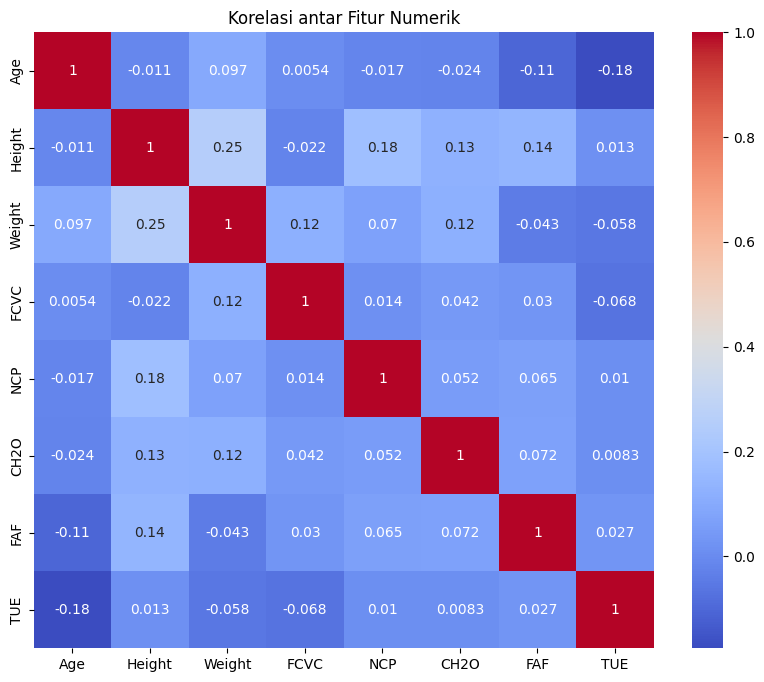

In [3]:
# 1. Baca data
df = pd.read_csv('/content/drive/MyDrive/Bengkel Koding/capstone/ObesityDataSet.csv')

# 2. Tampilkan informasi dasar
print("Shape (baris, kolom):", df.shape)
print("\nInfo dataset:")
print(df.info())
print("\nDeskripsi statistik:")
print(df.describe(include='all'))
print("\nBeberapa baris pertama:")
print(df.head())

# 3. Cek missing values
print("\nJumlah missing values per kolom:")
print(df.isnull().sum())

# 4. Cek nilai unik per kolom
print("\nJumlah nilai unik per kolom:")
print(df.nunique())

# 5. Cek data duplikat
print("\nJumlah data duplikat:", df.duplicated().sum())

# 6. Cek keseimbangan data (pada kolom 'NObeyesdad')
if 'NObeyesdad' in df.columns:
    print("\nDistribusi kelas target (NObeyesdad):")
    print(df['NObeyesdad'].value_counts())
    df['NObeyesdad'].value_counts().plot(kind='bar')
    plt.title('Distribusi Kelas Target')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 7. Konversi kolom numerik dari object ke float
kolom_numerik = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
for col in kolom_numerik:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # invalid parsing jadi NaN

# 8. Deteksi outlier dengan boxplot
for col in kolom_numerik:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot: {col}')
    plt.show()

# 9. Heatmap korelasi numerik
plt.figure(figsize=(10, 8))
sns.heatmap(df[kolom_numerik].corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi antar Fitur Numerik')
plt.show()

# 10. Visualisasi interaktif dengan Plotly
fig = px.scatter(
    df,
    x='Height',
    y='Weight',
    color='Gender',
    hover_data=['Age', 'NObeyesdad'],
    title='Plot Interaktif: Tinggi vs Berat berdasarkan Gender'
)
fig.show()

#📌 Kesimpulan EDA Dataset Obesitas
1. Struktur dan Kualitas Data

    Dataset terdiri dari 2.111 baris dan 17 kolom.

    Tipe data awal didominasi oleh object (string), bahkan pada kolom numerik seperti Age, Height, dan Weight.

    Setelah dikonversi, ditemukan bahwa beberapa kolom mengandung data yang tidak valid (misal nilai string dalam kolom angka), sehingga menjadi NaN.

2. Missing Values

    Beberapa kolom memiliki missing values (nilai hilang), namun jumlahnya relatif kecil (sekitar 5–15 per kolom).

    Kolom Age, Height, dan Weight termasuk yang memiliki nilai hilang, sehingga perlu ditangani sebelum pemodelan (imputasi atau penghapusan).

3. Data Duplikat

    Terdapat 18 baris duplikat, yang sebaiknya dihapus untuk menjaga kualitas analisis dan model prediktif.

4. Distribusi Kelas (Target: NObeyesdad)

    Data target (kategori obesitas) terdiri dari 7 kelas, namun tidak seimbang:

    Kelas seperti Obesity_Type_I dan Overweight_Level_I memiliki jumlah data paling banyak.

    Kelas seperti Insufficient_Weight relatif sedikit, yang bisa menyebabkan bias pada model klasifikasi.

5. Outlier

    Berdasarkan visualisasi boxplot, ditemukan adanya outlier (nilai ekstrem) di beberapa kolom numerik, seperti:

    FAF (frekuensi aktivitas fisik),

    TUE (waktu penggunaan teknologi),

    CH2O (konsumsi air),

    dan Weight (berat badan).

    Outlier perlu dipertimbangkan saat preprocessing, karena bisa mempengaruhi performa model.

6. Korelasi antar Fitur Numerik

    Terdapat korelasi positif antara:

    Height dan Weight,

    FCVC (frekuensi konsumsi sayuran) dan NCP (jumlah makanan utama per hari).

    Sebaliknya, beberapa fitur memiliki korelasi sangat lemah atau tidak signifikan terhadap fitur lainnya.

7. Visualisasi Interaktif (Plotly)

    Scatter plot antara Height dan Weight menunjukkan distribusi yang cukup tersebar luas, namun terdapat tren perbedaan antara gender.

    Fitur interaktif membantu mengamati pola distribusi antar individu berdasarkan kategori obesitas dan atribut lainnya.

## Pre-processing

# Mengatasi Missing value

In [4]:
# Mengganti data numerik yang hilang dengan median
kolom_numerik = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
for col in kolom_numerik:
    df[col].fillna(df[col].median(), inplace=True)
# Mengganti data kategorikan yang hilang dengan modus
kolom_kategorikal = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
for col in kolom_kategorikal:
  df[col].fillna(df[col].mode()[0], inplace=True)

# Cek apakah data hilang sudah diatasi
print(df.isnull().sum())

# Cek apakah ada error ada masih ada data yang hilang
assert df.isnull().sum().sum() == 0, "Masih ada missing value!"

Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


<ipython-input-4-9dda20dee921>:4: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



<ipython-input-4-9dda20dee921>:8: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[co

In [8]:
# Pengecekan sekali lagi
df['CALC'].unique()

array(['no', 'Sometimes', 'Frequently', '?', 'Always'], dtype=object)

In [9]:
# Merubah tanda tanya menjadi Nan
df.replace('?', np.nan, inplace=True)

# Tampilkan lagi missing value
df.isnull().sum()

,0
Age,0
Gender,13
Height,0
Weight,0
CALC,15
FAVC,11
FCVC,0
NCP,0
SCC,8
SMOKE,8


In [10]:
# Kolom yang hilang termasuk kategorikal jadi diganti dengan modus
kolom_kategorikal = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
for col in kolom_kategorikal:
  df[col].fillna(df[col].mode()[0], inplace=True)

# Cek kembali setelah mengatasi missing value
df.isnull().sum()

<ipython-input-10-913aac5cabf4>:4: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





,0
Age,0
Gender,0
Height,0
Weight,0
CALC,0
FAVC,0
FCVC,0
NCP,0
SCC,0
SMOKE,0


# Penanganan data duplikat


In [11]:
# Drop data duplikat
df.drop_duplicates(inplace=True)

#cek data duplikat
df.duplicated().sum()

np.int64(0)

# Penanganan Outlier


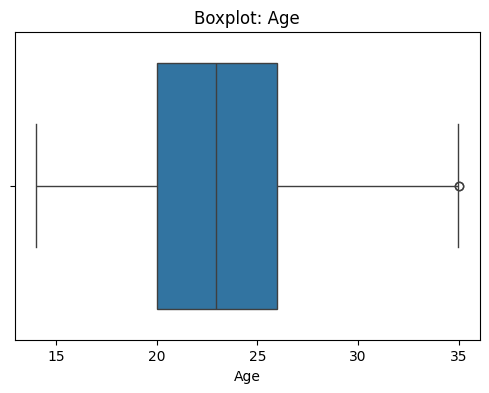

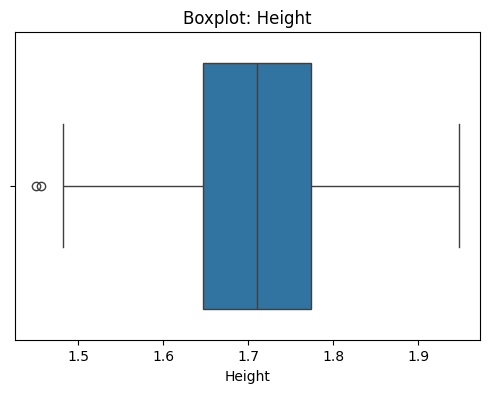

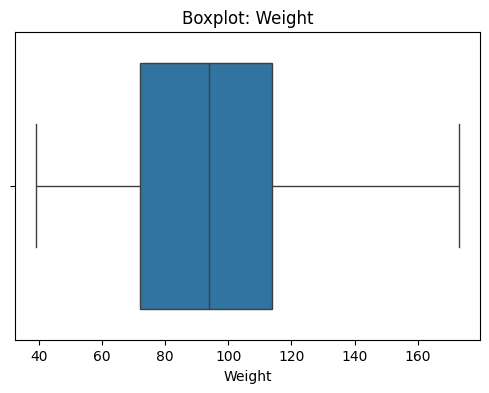

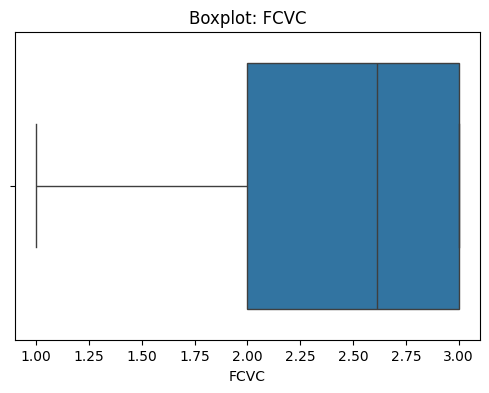

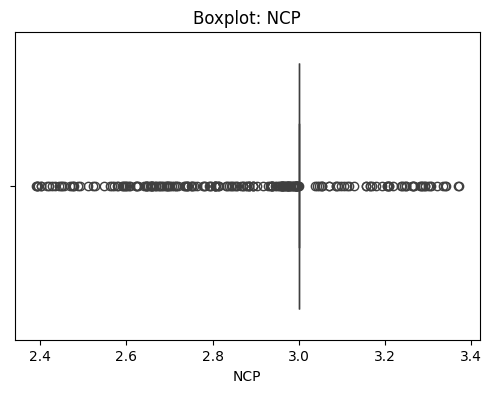

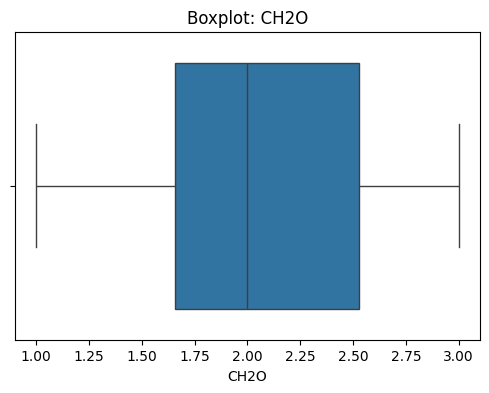

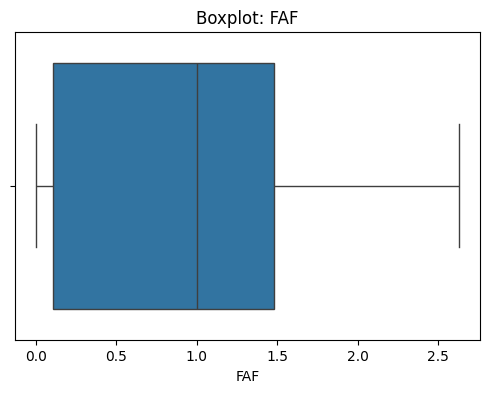

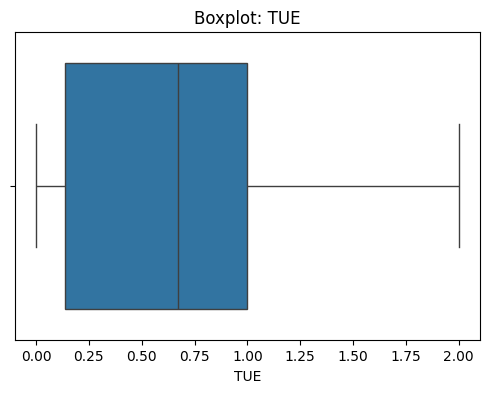

In [12]:
# Age
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Age'] >= lower_bound) & (df['Age'] <= upper_bound)]

# Height
Q1 = df['Height'].quantile(0.25)
Q3 = df['Height'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Height'] >= lower_bound) & (df['Height'] <= upper_bound)]

# Weight
Q1 = df['Weight'].quantile(0.25)
Q3 = df['Weight'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Weight'] >= lower_bound) & (df['Weight'] <= upper_bound)]

# FCVC
Q1 = df['FCVC'].quantile(0.25)
Q3 = df['FCVC'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['FCVC'] >= lower_bound) & (df['FCVC'] <= upper_bound)]

# NCP
Q1 = df['NCP'].quantile(0.25)
Q3 = df['NCP'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['NCP'] >= lower_bound) & (df['NCP'] <= upper_bound)]

# CH20
Q1 = df['CH2O'].quantile(0.25)
Q3 = df['CH2O'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1
df = df[(df['CH2O'] >= lower_bound) & (df['CH2O'] <= upper_bound)]

# FAF
Q1 = df['FAF'].quantile(0.25)
Q3 = df['FAF'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1
df = df[(df['FAF'] >= lower_bound) & (df['FAF'] <= upper_bound)]

# TUE
Q1 = df['TUE'].quantile(0.25)
Q3 = df['TUE'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1
df = df[(df['TUE'] >= lower_bound) & (df['TUE'] <= upper_bound)]

# Cek hasil penanganan outlier
kolom_numerik = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
for col in kolom_numerik:
  plt.figure(figsize=(6,4))
  sns.boxplot(x=df[col])
  plt.title(f'Boxplot: {col}')
  plt.show()

# Encoding

In [13]:
# Cek informasi df dan tampilkan 5 data awal
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1238 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             1238 non-null   float64
 1   Gender                          1238 non-null   object 
 2   Height                          1238 non-null   float64
 3   Weight                          1238 non-null   float64
 4   CALC                            1238 non-null   object 
 5   FAVC                            1238 non-null   object 
 6   FCVC                            1238 non-null   float64
 7   NCP                             1238 non-null   float64
 8   SCC                             1238 non-null   object 
 9   SMOKE                           1238 non-null   object 
 10  CH2O                            1238 non-null   float64
 11  family_history_with_overweight  1238 non-null   object 
 12  FAF                             1238 no

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
5,29.0,Male,1.62,53.0,Sometimes,yes,2.0,3.0,no,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,23.0,Female,1.50,55.0,Sometimes,yes,3.0,3.0,no,no,2.0,yes,1.0,0.0,Sometimes,Motorbike,Normal_Weight


In [14]:
# Pemberian label encoder
# Label Encoding untuk kolom ordinal & biner
label_cols = ['CALC', 'CAEC', 'FAVC', 'SCC', 'SMOKE', 'family_history_with_overweight', 'NObeyesdad']
le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])
    # Tampilkan mapping kategorikal ke angka
    print(f"Mapping untuk kolom '{col}':")
    for i, label in enumerate(le.classes_):
        print(f"  '{label}' → {i}")
    print()

# One-Hot Encoding untuk kolom nominal
nominal_cols = ['Gender', 'MTRANS']
df = pd.get_dummies(df, columns=nominal_cols)

# Lihat 5 baris pertama setelah encoding
df.head()

Mapping untuk kolom 'CALC':
  'Frequently' → 0
  'Sometimes' → 1
  'no' → 2

Mapping untuk kolom 'CAEC':
  'Always' → 0
  'Frequently' → 1
  'Sometimes' → 2
  'no' → 3

Mapping untuk kolom 'FAVC':
  'no' → 0
  'yes' → 1

Mapping untuk kolom 'SCC':
  'no' → 0
  'yes' → 1

Mapping untuk kolom 'SMOKE':
  'no' → 0
  'yes' → 1

Mapping untuk kolom 'family_history_with_overweight':
  'no' → 0
  'yes' → 1

Mapping untuk kolom 'NObeyesdad':
  'Insufficient_Weight' → 0
  'Normal_Weight' → 1
  'Obesity_Type_I' → 2
  'Obesity_Type_II' → 3
  'Obesity_Type_III' → 4
  'Overweight_Level_I' → 5
  'Overweight_Level_II' → 6



,Age,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,...,TUE,CAEC,NObeyesdad,Gender_Female,Gender_Male,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.0,1.62,64.0,2,0,2.0,3.0,0,0,2.0,...,1.0,2,1,True,False,False,False,False,True,False
2,23.0,1.80,77.0,0,0,2.0,3.0,0,0,2.0,...,1.0,2,1,False,True,False,False,False,True,False
3,27.0,1.80,87.0,0,0,3.0,3.0,0,0,2.0,...,0.0,2,5,False,True,False,False,False,False,True
5,29.0,1.62,53.0,1,1,2.0,3.0,0,0,2.0,...,0.0,2,1,False,True,True,False,False,False,False
6,23.0,1.50,55.0,1,1,3.0,3.0,0,0,2.0,...,0.0,2,1,True,False,False,False,True,False,False
